# Case Study

### Experiment I
Audacity is conducting an A/B test on their homepage to assess the impact of a more engaging design aimed at increasing user exploration of their courses and progression to the next stage of the funnel. The click-through rate (CTR) metric will be used to evaluate the effectiveness of the design changes on the "Explore Courses" button. The outcome of the A/B test will inform the decision to implement the changes or maintain the current design. 

### Experiment II

Audacity's second A/B test focuses on the course overview page, where they plan to add a more career-focused description to potentially increase course enrollment and completion rates. Multiple metrics, including Enrollment Rate, Average Reading Duration, Average Classroom Time, and Completion Rate, will be analyzed individually to assess the statistical significance of observed differences. To ensure a robust conclusion, the Bonferroni Correction will be applied, adjusting the alpha value by dividing it by the number of tests conducted. However, considering potential correlations among metrics, more advanced methods like the closed testing procedure, Boole-Bonferroni bound, or the Holm-Bonferroni method may be explored for a comprehensive analysis.




Three data sets are used to conduct the study:
- homepage_actions.csv
- course_page_actions.csv
- classroom_actions.csv


## Packages

In [1]:
!pip install nb_black > /dev/null 2>&1

In [2]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

%reload_ext nb_black
# np.random.seed(42) # In order to get the same random numbers in each run
%matplotlib inline

<IPython.core.display.Javascript object>

### 1. Data Exploration

In [3]:
df1 = pd.read_csv("homepage_actions.csv")
df1.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


<IPython.core.display.Javascript object>

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


<IPython.core.display.Javascript object>

In [5]:
df1.isnull().sum()

timestamp    0
id           0
group        0
action       0
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
df1[df1.columns].describe().round(2)

,id
count,8188.00
mean,564699.75
std,219085.85
min,182988.00
25%,373637.50
50%,566840.50
75%,758078.00
max,937217.00


<IPython.core.display.Javascript object>

In [7]:
df2 = pd.read_csv("course_page_actions.csv")
df2.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


<IPython.core.display.Javascript object>

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4074 non-null   object 
 1   id         4074 non-null   int64  
 2   group      4074 non-null   object 
 3   action     4074 non-null   object 
 4   duration   4049 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 159.3+ KB


<IPython.core.display.Javascript object>

In [9]:
df2.isnull().sum()

timestamp     0
id            0
group         0
action        0
duration     25
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
df2[df2.columns].describe().round(2)

,id,duration
count,4074.00,4049.00
mean,563931.44,123.46
std,216580.45,72.53
min,182960.00,0.01
25%,378821.75,67.11
50%,564200.00,118.72
75%,753503.75,172.61
max,937292.00,421.57


<IPython.core.display.Javascript object>

In [11]:
df3 = pd.read_csv("classroom_actions.csv")
df3.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


<IPython.core.display.Javascript object>

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   3829 non-null   object
 1   id          3829 non-null   int64 
 2   group       3829 non-null   object
 3   total_days  3829 non-null   int64 
 4   completed   3829 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 123.5+ KB


<IPython.core.display.Javascript object>

In [13]:
df3.isnull().sum()

timestamp     0
id            0
group         0
total_days    0
completed     0
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
df3[df3.columns].describe().round(2)

,id,total_days
count,3829.00,3829.00
mean,558788.79,74.11
std,215527.50,22.40
min,182951.00,1.00
25%,375055.00,58.00
50%,560227.00,74.00
75%,741535.00,91.00
max,937032.00,135.00


<IPython.core.display.Javascript object>

### 2. Characteristics of datasets: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [15]:
# total number of actions
df1.shape[0], df2.shape[0], df3.shape[0]

(8188, 4074, 3829)

<IPython.core.display.Javascript object>

In [16]:
# number of unique users
df1.id.nunique(), df2.id.nunique(), df3.id.nunique()

(6328, 4028, 3829)

<IPython.core.display.Javascript object>

In [17]:
df1.group.value_counts(), df2.group.value_counts(), df3.group.value_counts()

(control       4264
 experiment    3924
 Name: group, dtype: int64,
 experiment    2100
 control       1974
 Name: group, dtype: int64,
 experiment    2165
 control       1664
 Name: group, dtype: int64)

<IPython.core.display.Javascript object>

In [18]:
df1.groupby(["group"])["id"].nunique()

group
control       3332
experiment    2996
Name: id, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
df1.groupby(["group", "action"])["id"].nunique()


group       action
control     click      932
            view      3332
experiment  click      928
            view      2996
Name: id, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
df2.groupby(["group", "action"])["id"].nunique()

group       action
control     enroll     375
            view      1586
experiment  enroll     439
            view      1645
Name: id, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
df3.groupby(["group", "completed"])["id"].nunique()

group       completed
control     False        1045
            True          619
experiment  False        1313
            True          852
Name: id, dtype: int64

<IPython.core.display.Javascript object>

### 3. Length of the experiment 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [22]:
timestamp_str1 = df1.timestamp.min()
timestamp_str2 = df1.timestamp.max() 

# Convert timestamp strings to datetime objects
timestamp1 = dt.strptime(timestamp_str1, "%Y-%m-%d %H:%M:%S.%f")
timestamp2 = dt.strptime(timestamp_str2, "%Y-%m-%d %H:%M:%S.%f")

# Calculate the difference between the two timestamps
time_difference = timestamp2 - timestamp1

# Access individual components of the time difference
days_difference = time_difference.days
seconds_difference = time_difference.seconds
hours_difference = seconds_difference // 3600
minutes_difference = (seconds_difference % 3600) // 60
seconds_difference = seconds_difference % 60

# Print the results
print(f"Time Difference for homepage_actions: {days_difference} days, {hours_difference} hours, {minutes_difference} minutes, {seconds_difference} seconds")


Time Difference for homepage_actions: 115 days, 16 hours, 41 minutes, 40 seconds


<IPython.core.display.Javascript object>

In [23]:
timestamp_str1 = df2.timestamp.min()
timestamp_str2 = df2.timestamp.max() 

# Convert timestamp strings to datetime objects
timestamp1 = dt.strptime(timestamp_str1, "%Y-%m-%d %H:%M:%S.%f")
timestamp2 = dt.strptime(timestamp_str2, "%Y-%m-%d %H:%M:%S.%f")

# Calculate the difference between the two timestamps
time_difference = timestamp2 - timestamp1

# Access individual components of the time difference
days_difference = time_difference.days
seconds_difference = time_difference.seconds
hours_difference = seconds_difference // 3600
minutes_difference = (seconds_difference % 3600) // 60
seconds_difference = seconds_difference % 60

# Print the results
print(f"Time Difference for course_page_actions: {days_difference} days, {hours_difference} hours, {minutes_difference} minutes, {seconds_difference} seconds")


Time Difference for course_page_actions: 115 days, 17 hours, 23 minutes, 28 seconds


<IPython.core.display.Javascript object>

In [24]:
timestamp_str1 = df3.timestamp.min()
timestamp_str2 = df3.timestamp.max() 

# Convert timestamp strings to datetime objects
timestamp1 = dt.strptime(timestamp_str1, "%Y-%m-%d %H:%M:%S.%f")
timestamp2 = dt.strptime(timestamp_str2, "%Y-%m-%d %H:%M:%S.%f")

# Calculate the difference between the two timestamps
time_difference = timestamp2 - timestamp1

# Access individual components of the time difference
days_difference = time_difference.days
seconds_difference = time_difference.seconds
hours_difference = seconds_difference // 3600
minutes_difference = (seconds_difference % 3600) // 60
seconds_difference = seconds_difference % 60

# Print the results
print(f"Time Difference for classroom_actions: {days_difference} days, {hours_difference} hours, {minutes_difference} minutes, {seconds_difference} seconds")


Time Difference for classroom_actions: 161 days, 22 hours, 15 minutes, 30 seconds


<IPython.core.display.Javascript object>

### 4. Recorded action types in datasets
(i.e., What are the unique values in the action column?)

In [25]:
df1.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
df2.action.value_counts()

view      3260
enroll     814
Name: action, dtype: int64

<IPython.core.display.Javascript object>

In [27]:
df3.completed.value_counts()

False    2358
True     1471
Name: completed, dtype: int64

<IPython.core.display.Javascript object>

### 5. The null and alternative hypotheses formulation
For click through rates $CTR$, $CTR_{old}$ and $CTR_{new}$ are old and new rates so in our hypotheses.

$$H_0:  CTR_{old} > = CTR_{new} $$
     $$H_1: CTR_{old} < CTR_{new}  $$
     
For Enrollment rate $ER$, $ER_{old}$ and $ER_{new}$ are old and new enrollment rates so in our hypotheses.

$$H_0:  ER_{old} > = ER_{new} $$
     $$H_1: ER_{old} < ER_{new}  $$
     
     
For Average reading duration $ARD$, $ARD_{old}$ and $ARD_{new}$ are old and new rates so in our hypotheses.

$$H_0:  ARD_{old} > = ARD_{new} $$
     $$H_1: ARD_{old} < ARD_{new}  $$
     
     
     
For Average classroom time $ACT$, $ACT_{old}$ and $ACT_{new}$ are old and new rates so in our hypotheses.

$$H_0:  ACT_{old} > = ACT_{new} $$
     $$H_1: ACT_{old} < ACT_{new}  $$
     
     
     
For Completion rate $CR$, $CR_{old}$ and $CR_{new}$ are old and new rates so in our hypotheses.

$$H_0:  CR_{old} > = CR_{new} $$
     $$H_1: CR_{old} < CR_{new}  $$


### 6. Computing difference Metric$_{diff}$ = Metric$_{new}$ - Metric$_{old}$ ?

Compute the observed difference between metrics, for the control(old) and experiment(new) groups

### Metric # 1 - Click Through Rate
The Click-Through Rate (CTR) is a metric used to measure the effectiveness of an online advertising campaign or a webpage. It is calculated as the ratio of the number of clicks on a specific link or element to the number of times the link or element was displayed (impressions).

The formula for Click-Through Rate (CTR) is:
$$ CTR = \frac{Number\ of\ Clicks}{Number\ of\ Impressions} $$
Where:
- \( Number of Clicks \) is the total number of clicks on the link or element.
- \( Number of Impressions \) is the total number of times the link or element was displayed.



In [28]:
df_control = df1.query('group == "control"')
ctr_old = (
    df_control.query('action == "click"').id.nunique()
    / df_control.query('action == "view"').id.nunique()
)

<IPython.core.display.Javascript object>

In [29]:
df_experiment = df1.query('group == "experiment"')
ctr_new = (
    df_experiment.query('action == "click"').id.nunique()
    / df_experiment.query('action == "view"').id.nunique()
)

<IPython.core.display.Javascript object>

In [30]:
ctr_new, ctr_old

(0.3097463284379172, 0.2797118847539016)

<IPython.core.display.Javascript object>

In [31]:
ctr_diff = ctr_new - ctr_old
ctr_diff

0.030034443684015644

<IPython.core.display.Javascript object>

### 7. Sampling  for Metric$_{diff}$ ?


To bootstrap the sample and simulate the sampling distribution for observing the difference:

- Sample with replacement from observed data for control and experiment groups.
- Compute metrics of interest for each bootstrap sample.
- Repeat the process 10,000 times for multiple bootstrap samples.
- Plot a histogram to analyze the distribution of differences.
- Assess variability and draw inferences about the population.
- To find 'p' value, simulate the null distribution and determine the probability that our statistic originated from it. Simulate from a null distribution centered at zero with the same standard deviation as our sampling distribution.

In [32]:
diffs = []
for _ in range(10000):
    bi_samp = df1.sample(df1.shape[0], replace=True)
    df_control = bi_samp.query('group == "control"')
    df_experiment = bi_samp.query('group == "experiment"')
    ctr_new = (
        df_control.query('action == "click"').id.nunique()
        / df_control.query('action == "view"').id.nunique()
    )
    ctr_new = (
        df_experiment.query('action == "click"').id.nunique()
        / df_experiment.query('action == "view"').id.nunique()
    )
    diffs.append(ctr_new - ctr_old)

<IPython.core.display.Javascript object>

(array([   8.,   58.,  352., 1352., 2669., 2953., 1847.,  613.,  136.,
          12.]),
 array([-0.00618551,  0.00080638,  0.00779827,  0.01479016,  0.02178205,
         0.02877394,  0.03576584,  0.04275773,  0.04974962,  0.05674151,
         0.0637334 ]),
 <BarContainer object of 10 artists>)

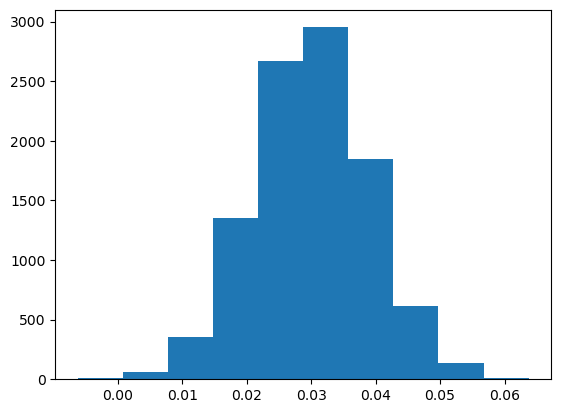

<IPython.core.display.Javascript object>

In [33]:
plt.hist(diffs)

In [34]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

<IPython.core.display.Javascript object>

- plot null distribution 

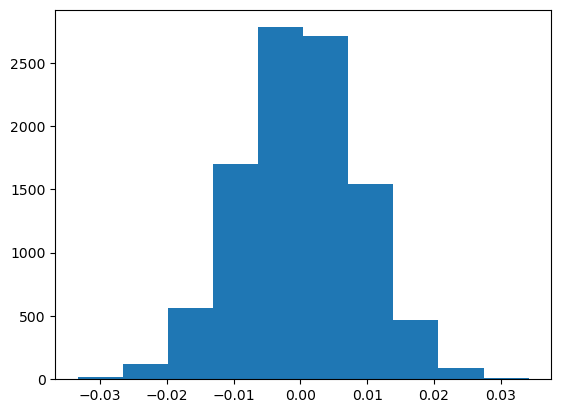

<IPython.core.display.Javascript object>

In [35]:
plt.hist(null_vals);


visualize the distribution of the statistic $CTR_{diff}$ and assess if it aligns with our desired distribution 

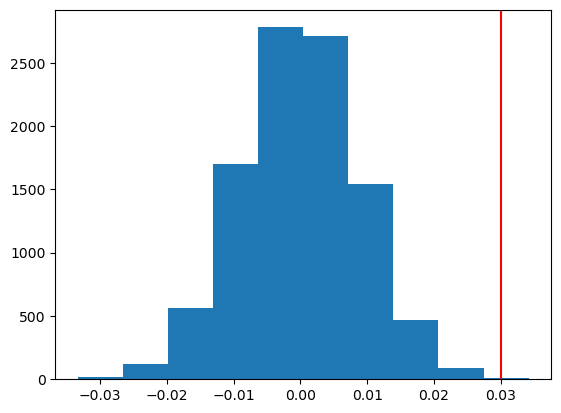

<IPython.core.display.Javascript object>

In [36]:
plt.hist(null_vals)
plt.axvline(x=ctr_diff, color="red")

To assess the significance of our observed difference by computing its mean $CTR_{diff} = CTR_{new} - CTR_{old}$ 
we establish the following hypotheses: $H_0$ The click-through rate for the old design is greater than or equal to the CTR for the new design. and $H_1$ The CTR for the old design is less than the CTR for the new design.

$$H_0:  CTR_{old} > = CTR_{new} $$ 
     $$H_1: CTR_{old} < CTR_{new}  $$

In [37]:
(null_vals > ctr_diff).mean()

0.0002

<IPython.core.display.Javascript object>

With a p-value of less than 0.01, it seems unlikely that the statistic is from the null. we can reject the null and take the alternative hypothesis $H_1$ 

### 8. Conclusion: 
We reject the null hypothesis, suggesting that there's evidence to support launching Audacity's experiment (new) page.

### Metric # 2 - Enrollment Rate

Enrollment rate is a metric used to measure the proportion of users who enroll in a course or program out of the total number of users who visited the enrollment page.

The formula for Click-Through Rate for enrollment (ER) is:
$$ ER = \frac{Number\ of\ enrolled unique users}{Number\ of\ Impressions} $$
Where:
- \( Number of enrollment \) is the total number of enrolled users.
- \( Number of Impressions \) is the total number of users.


In [38]:
df2 = pd.read_csv("course_page_actions.csv")
df2.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


<IPython.core.display.Javascript object>

CTR of enrollment button for experiment and control groups for course page are:

In [39]:
df_control = df2.query('group == "control"')
er_old = (
    df_control.query('action == "enroll"').id.nunique()
    / df_control.query('action == "view"').id.nunique()
)
er_old

0.2364438839848676

<IPython.core.display.Javascript object>

In [40]:
df_experiment = df2.query('group == "experiment"')
er_new = (
    df_experiment.query('action == "enroll"').id.nunique()
    / df_experiment.query('action == "view"').id.nunique()
)
er_new

0.2668693009118541

<IPython.core.display.Javascript object>

In [41]:
er_diff = er_new - er_old
er_diff

0.030425416926986526

<IPython.core.display.Javascript object>

In [42]:
# Create a sampling distribution of the ER_diff in proportions with bootstraping

diffs = []
for _ in range(1000):
    bi_samp = df2.sample(df2.shape[0], replace=True)
    df_control = bi_samp.query('group == "control"')
    df_experiment = bi_samp.query('group == "experiment"')
    er_old = (
        df_control.query('action == "enroll"').id.nunique()
        / df_control.query('action == "view"').id.nunique()
    )
    er_new = (
        df_experiment.query('action == "enroll"').id.nunique()
        / df_experiment.query('action == "view"').id.nunique()
    )
    diffs.append(er_new - er_old)

<IPython.core.display.Javascript object>

(array([ 10.,  45., 120., 236., 245., 194., 103.,  37.,   7.,   3.]),
 array([-0.01251697, -0.00266527,  0.00718643,  0.01703813,  0.02688984,
         0.03674154,  0.04659324,  0.05644494,  0.06629665,  0.07614835,
         0.08600005]),
 <BarContainer object of 10 artists>)

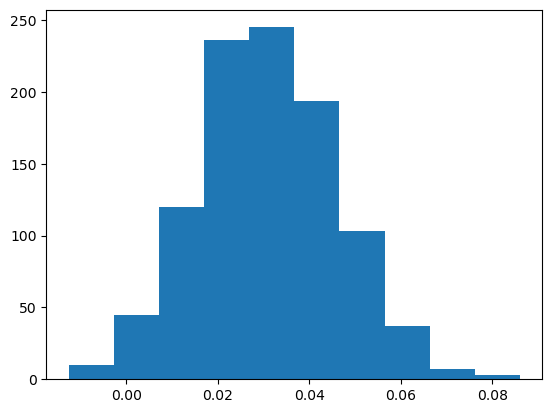

<IPython.core.display.Javascript object>

In [43]:
# making diffs a numpy array and then plotting it
diffs = np.array(diffs)

plt.hist(diffs)

(array([  3.,  14.,  66., 161., 250., 267., 158.,  57.,  21.,   3.]),
 array([-0.0499524 , -0.04002287, -0.03009334, -0.02016381, -0.01023427,
        -0.00030474,  0.00962479,  0.01955432,  0.02948386,  0.03941339,
         0.04934292]),
 <BarContainer object of 10 artists>)

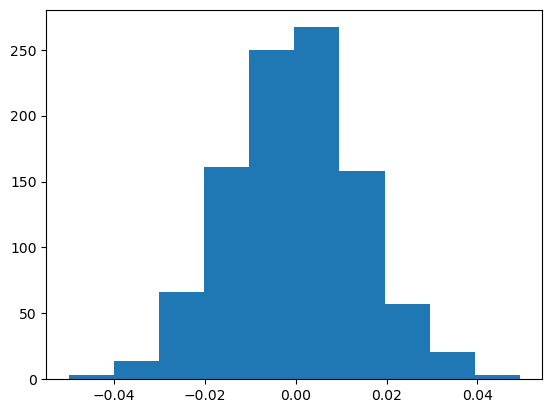

<IPython.core.display.Javascript object>

In [44]:
# simulating the distribution under null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

plt.hist(null_vals)

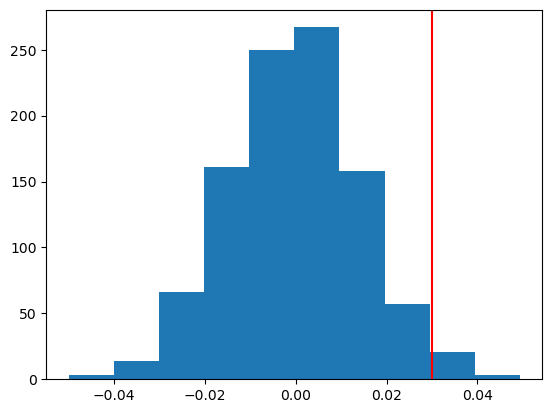

<IPython.core.display.Javascript object>

In [45]:
# plot observed CTR with the null dist
plt.hist(null_vals)
plt.axvline(x=ctr_diff, color="red")

In [46]:
# compute p-value
(null_vals > ctr_diff).mean()

0.023

<IPython.core.display.Javascript object>

With a type I error rate of 0.05 and a p-value of 0.021, it seems unlikely that the statistic is from the null. we can reject the null and take the alternative hypothesis $H_1$ 

### Conclusion: 

This indicates that there is sufficient evidence to conclude that the enrollment rate for this course increases when using the experimental description on its overview page at a significance level of 0.05.


### Metric # 3 - Average Reading Duration
Average reading duration refers to the mean amount of time spent by users reading content, typically measured in seconds. It provides insight into user engagement and interest in the material presented.

The formula to calculate average reading duration is: 


Average Reading Duration  = Total Reading Time/ Number of Users = mean(Reading Time)

Where:

__Total Reading Time__ is the sum of reading times for all users.
__Number of Users__ is the total number of users who engaged with the content.

In [47]:
df2

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
...,...,...,...,...,...
4069,2017-01-18 09:39:08.046251,931490,control,view,58.846204
4070,2017-01-18 09:44:15.239671,410222,experiment,enroll,101.231821
4071,2017-01-18 09:56:26.948171,364458,control,view,293.490566
4072,2017-01-18 10:10:18.293253,443603,experiment,view,149.026959


<IPython.core.display.Javascript object>

In [48]:
views = df2.query('action == "view"')
views.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


<IPython.core.display.Javascript object>

In [49]:
rd = views.groupby(["id", "group"])["duration"].mean()
rd = rd.reset_index()

<IPython.core.display.Javascript object>

In [50]:
rd.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


<IPython.core.display.Javascript object>

In [51]:
rd_control = df2.query('group == "control"')["duration"].mean()
rd_control

115.40710650582038

<IPython.core.display.Javascript object>

In [52]:
rd_experiment = df2.query('group == "experiment"')["duration"].mean()
rd_experiment

130.93220512539477

<IPython.core.display.Javascript object>

In [53]:
rd_diff = rd_experiment - rd_control

<IPython.core.display.Javascript object>

In [54]:
np.random.seed(42)
diffs = []
for _ in range(1000):
    bi_samp = df2.sample(df2.shape[0], replace=True)
    rd_control = bi_samp.query('group == "control"')["duration"].mean()
    rd_experiment = bi_samp.query('group == "experiment"')["duration"].mean()
    diffs.append(rd_control - rd_experiment)

<IPython.core.display.Javascript object>

In [55]:
diffs = np.array(diffs)

<IPython.core.display.Javascript object>

(array([  1.,  12.,  29., 120., 227., 310., 194.,  84.,  18.,   5.]),
 array([-24.49990495, -22.8129333 , -21.12596164, -19.43898998,
        -17.75201833, -16.06504667, -14.37807501, -12.69110335,
        -11.0041317 ,  -9.31716004,  -7.63018838]),
 <BarContainer object of 10 artists>)

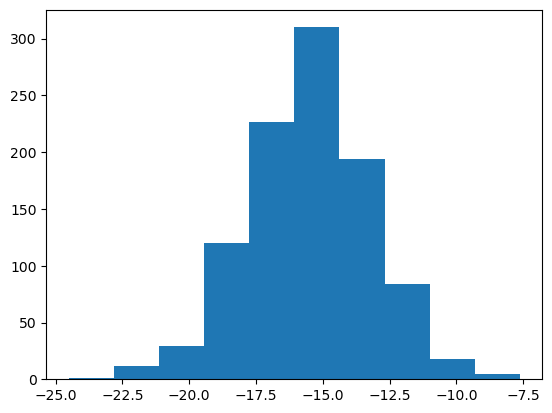

<IPython.core.display.Javascript object>

In [56]:
plt.hist(diffs)

In [57]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

<IPython.core.display.Javascript object>

(array([  1.,   6.,  45., 147., 260., 275., 178.,  69.,  14.,   5.]),
 array([-8.81683931, -7.10630227, -5.39576524, -3.6852282 , -1.97469117,
        -0.26415413,  1.4463829 ,  3.15691994,  4.86745697,  6.577994  ,
         8.28853104]),
 <BarContainer object of 10 artists>)

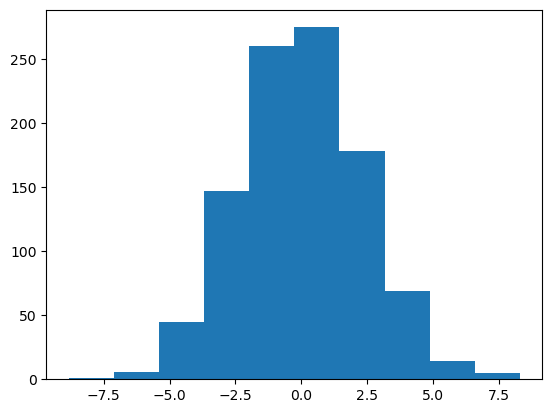

<IPython.core.display.Javascript object>

In [58]:
plt.hist(null_vals)

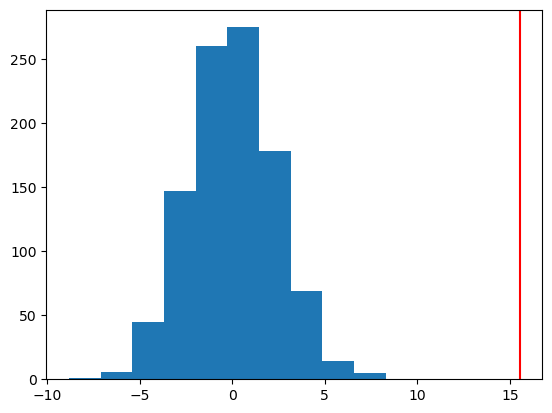

<IPython.core.display.Javascript object>

In [59]:
plt.hist(null_vals)
plt.axvline(x=rd_diff, color="red")

In [60]:
(null_vals > rd_diff).mean()

0.0

<IPython.core.display.Javascript object>

With a type I error rate of 0.05 and a p-value of 0.0, we reject the null hypothesis in favour of $H_1$

### Conclusion: 

This indicates that there is strong evidence to conclude that average reading time increased after seeing the experimental description in the course overview page at a significance level of 0.05.

### Metric # 4 - Average Classroom Time

Average classroom time refers to the mean amount of time spent by users actively participating in a virtual classroom environment (here measured in days). It provides insight into user engagement and participation levels within the educational platform.

The formula to calculate average classroom time is:

Average Classroom Time = Total Classroom Time / Number of Users = mean(days)


Where:__Total Classroom Time__ is the sum of time spent by all users in the virtual classroom.
__Number of Users__ is the total number of users who participated in the virtual classroom.



In [61]:
df3 = pd.read_csv("classroom_actions.csv")
df3.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


<IPython.core.display.Javascript object>

In [62]:
act_control = df3.query('group == "control"')["total_days"].mean()
act_experiment = df3.query('group == "experiment"')["total_days"].mean()
act_control, act_experiment

(73.36899038461539, 74.6715935334873)

<IPython.core.display.Javascript object>

In [63]:
act_diff = act_experiment - act_control
act_diff

1.3026031488719099

<IPython.core.display.Javascript object>

In [64]:
diffs = []
for _ in range(1000):
    bi_samp = df3.sample(df3.shape[0], replace=True)
    act_control = bi_samp.query('group == "control"')["total_days"].mean()
    act_experiment = bi_samp.query('group == "experiment"')["total_days"].mean()
    diffs.append(act_experiment - act_control)

<IPython.core.display.Javascript object>

In [65]:
diffs = np.array(diffs)

<IPython.core.display.Javascript object>

(array([  9.,  26.,  90., 157., 238., 222., 144.,  87.,  18.,   9.]),
 array([-0.79808654, -0.374014  ,  0.05005855,  0.47413109,  0.89820363,
         1.32227617,  1.74634871,  2.17042126,  2.5944938 ,  3.01856634,
         3.44263888]),
 <BarContainer object of 10 artists>)

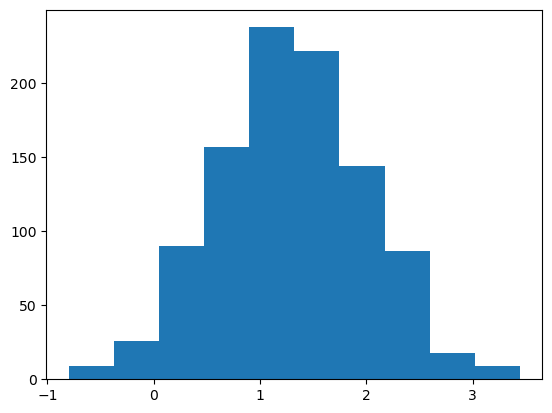

<IPython.core.display.Javascript object>

In [66]:
plt.hist(diffs)

In [67]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

<IPython.core.display.Javascript object>

(array([  3.,   3.,  25.,  85., 191., 283., 237., 120.,  45.,   8.]),
 array([-2.8563371 , -2.35382981, -1.85132252, -1.34881523, -0.84630794,
        -0.34380065,  0.15870664,  0.66121393,  1.16372122,  1.66622851,
         2.1687358 ]),
 <BarContainer object of 10 artists>)

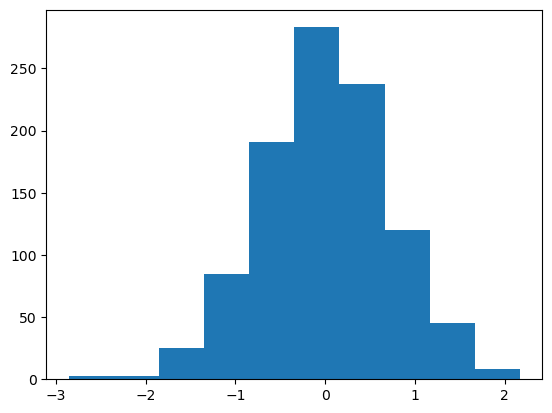

<IPython.core.display.Javascript object>

In [68]:
plt.hist(null_vals)

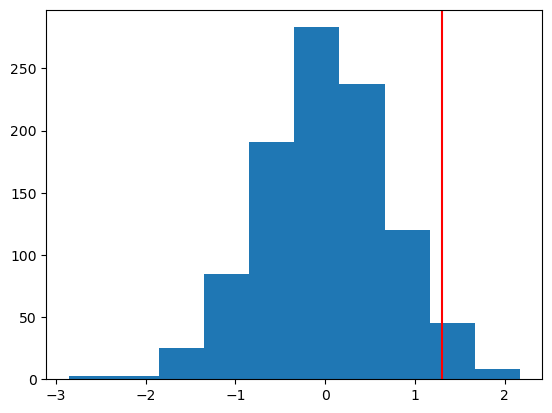

<IPython.core.display.Javascript object>

In [69]:
plt.hist(null_vals)
plt.axvline(x=act_diff, color="red")

In [70]:
(null_vals > act_diff).mean()

0.032

<IPython.core.display.Javascript object>

With a type I error rate of 0.05 and a p-value of 0.03, we reject the null hypothesis. 

### Conclusion: 
This suggests that there is evidence to conclude that users spend more time in the classroom after seeing the experimental description in the course overview page at a significance level of 0.05.

### Metric # 5 - Completion Rate
completion rate refers to the proportion of users who successfully complete a particular task or activity out of the total number of users who attempted it. In the context of an online course, completion rate typically measures the percentage of users who finish all the required modules or assignments.

The formula to calculate completion rate is:

Completion Rate = Number of Users who Completed / Total Number of Users who Attempted = mean(users who completed)

Where:

__Number of Users who Completed__ is the total number of users who successfully completed the task or activity.
__Total Number of Users who Attempted__ is the total number of users who tried to complete the task or activity.



In [71]:
df3.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


<IPython.core.display.Javascript object>

In [72]:
cr_control = df3.query('group== "control"').completed.mean()
cr_experiment = df3.query('group== "experiment"').completed.mean()
cr_control, cr_experiment

(0.3719951923076923, 0.3935334872979215)

<IPython.core.display.Javascript object>

In [73]:
# Compute observed difference in completion rates
cr_diff = cr_experiment - cr_control
cr_diff

0.02153829499022919

<IPython.core.display.Javascript object>

In [74]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    bi_samp = df3.sample(df3.shape[0], replace=True)
    cr_control = bi_samp.query('group == "control"').completed.mean()
    cr_experiment = bi_samp.query('group == "experiment"').completed.mean()
    diffs.append(cr_experiment - cr_control)

<IPython.core.display.Javascript object>

In [75]:
# convert to numpy array
diffs = np.array(diffs)

<IPython.core.display.Javascript object>

(array([   5.,   44.,  335., 1316., 2582., 3016., 1917.,  659.,  113.,
          13.]),
 array([-0.04375347, -0.03125949, -0.01876551, -0.00627153,  0.00622244,
         0.01871642,  0.0312104 ,  0.04370438,  0.05619836,  0.06869234,
         0.08118632]),
 <BarContainer object of 10 artists>)

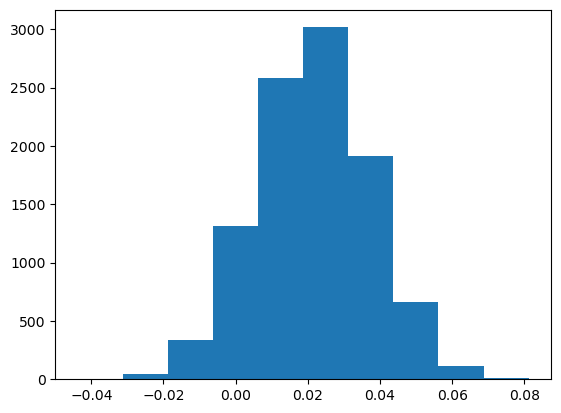

<IPython.core.display.Javascript object>

In [76]:
# plot distribution
plt.hist(diffs)

In [77]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

<IPython.core.display.Javascript object>

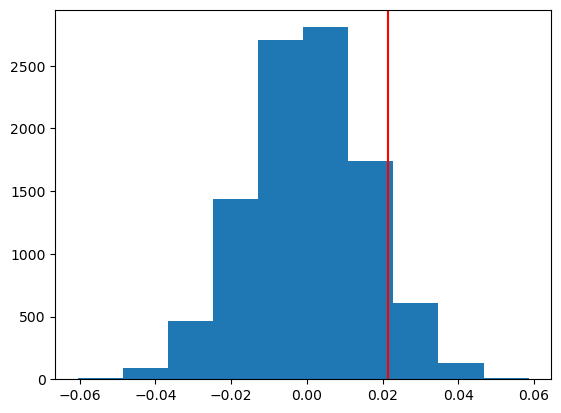

<IPython.core.display.Javascript object>

In [78]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(x=cr_diff, color="red")

In [79]:
(null_vals > cr_diff).mean()

0.0874

<IPython.core.display.Javascript object>


With a type I error rate of 0.05 and a p-value of 0.086, we fail to reject the null hypothesis.

### Conclusion: 
his implies that there is not enough evidence to conclude that the course completion rate increases when using the experimental description on its course overview page at a significance level of 0.05.

## Final Remarks: 

As we expand the number of metrics analyzed in our study, the likelihood of encountering false positives, or Type I errors, also increases. To address this concern, we employ the Bonferroni correction method, which adjusts the alpha level (typically set at 0.05) by dividing it by the number of comparisons being made. This adjustment ensures a more stringent threshold for statistical significance, helping to mitigate the risk of erroneously identifying significant results.

Upon computing the p-values for the five metrics in our experiment:

- Click Through rate = 0.0003
- Enrollment Rate =  0.0188
- Average Reading Duration = 0
- Average Classroom Time = 0.0384
- Completion Rate = 0.0846


We apply the Bonferroni correction to adjust the alpha level accordingly. Consequently, we find that the average reading duration metric demonstrates statistically significant results. This indicates that the observed difference in average reading duration between the experimental and control groups remains statistically significant, even after considering the increased likelihood of false positives associated with multiple comparisons.

